# Prédiction du Prix des Maisons – Techniques Avancées de Régression  
*Lilian Page, Torres Diego*

## 🎯 Objectif du Projet

Ce projet vise à effectuer une **analyse complète de données** sur un dataset issu du concours Kaggle :  
👉 [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

Le but est de comprendre les facteurs influençant le prix de vente des maisons et de construire un **modèle prédictif performant**, déployé via un **dashboard interactif**.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import sklearn
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.preprocessing import FunctionTransformer, LabelEncoder, Normalizer, StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin, clone
import sklearn_pandas
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score,train_test_split
from scipy import stats
from sklearn.linear_model import LinearRegression
from scipy.special import boxcox1p
import csv

import warnings
warnings.filterwarnings('ignore')

In [3]:
import sys
import scipy

print('Environment specification:\n')
print('python', '%s.%s.%s' % sys.version_info[:3])

for mod in np, scipy, sns, sklearn, pd:
    print(mod.__name__, mod.__version__)

Environment specification:

python 3.11.13
numpy 2.0.2
scipy 1.15.3
seaborn 0.13.2
sklearn 1.6.1
pandas 2.2.2


### Reading CSV file as Dataframe:

In [119]:
# Charger le fichier test.csv depuis GitHub
url = "https://raw.githubusercontent.com/LilianPAGE/ProjetDataScience/main/Projet/train.csv"
data_df = pd.read_csv(url)

url = "https://raw.githubusercontent.com/LilianPAGE/ProjetDataScience/main/Projet/test.csv"
test_df = pd.read_csv(url)

In [5]:
all_data = pd.concat((data_df.loc[:,:], test_df.loc[:, :]))
all_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


## Description des variables du dataset

- **SalePrice** : Prix de vente du bien en dollars. **Variable cible** à prédire.
- **MSSubClass** : Classe du bâtiment
- **MSZoning** : Classification générale du zonage
- **LotFrontage** : Longueur de la rue connectée à la propriété (pieds linéaires)
- **LotArea** : Surface du terrain (en pieds²)
- **Street** : Type d’accès routier
- **Alley** : Type d’accès par une allée
- **LotShape** : Forme générale du terrain
- **LandContour** : Platitude du terrain
- **Utilities** : Services publics disponibles
- **LotConfig** : Configuration du terrain
- **LandSlope** : Pente du terrain
- **Neighborhood** : Quartier dans les limites de la ville d’Ames
- **Condition1** : Proximité d’une route ou voie ferrée
- **Condition2** : Proximité d’un second axe routier ou voie ferrée
- **BldgType** : Type de logement
- **HouseStyle** : Style de logement
- **OverallQual** : Qualité globale des matériaux et finitions
- **OverallCond** : État général du bien
- **YearBuilt** : Année de construction initiale
- **YearRemodAdd** : Année de rénovation
- **RoofStyle** : Type de toiture
- **RoofMatl** : Matériau de toiture
- **Exterior1st** : Revêtement extérieur principal
- **Exterior2nd** : Second revêtement extérieur (si présent)
- **MasVnrType** : Type de maçonnerie de parement
- **MasVnrArea** : Surface de parement (en pieds²)
- **ExterQual** : Qualité des matériaux extérieurs
- **ExterCond** : État des matériaux extérieurs
- **Foundation** : Type de fondation
- **BsmtQual** : Hauteur du sous-sol
- **BsmtCond** : État général du sous-sol
- **BsmtExposure** : Présence de murs avec sortie extérieure
- **BsmtFinType1** : Qualité de la zone finie principale du sous-sol
- **BsmtFinSF1** : Surface finie de type 1
- **BsmtFinType2** : Qualité de la deuxième zone finie
- **BsmtFinSF2** : Surface finie de type 2
- **BsmtUnfSF** : Surface non finie du sous-sol
- **TotalBsmtSF** : Surface totale du sous-sol
- **Heating** : Type de chauffage
- **HeatingQC** : Qualité et état du système de chauffage
- **CentralAir** : Présence de climatisation centrale
- **Electrical** : Système électrique
- **1stFlrSF** : Surface du 1er étage (en pieds²)
- **2ndFlrSF** : Surface du 2ᵉ étage (en pieds²)
- **LowQualFinSF** : Surface finie de basse qualité
- **GrLivArea** : Surface habitable au-dessus du sol
- **BsmtFullBath** : Salles de bain complètes au sous-sol
- **BsmtHalfBath** : Demi-salles de bain au sous-sol
- **FullBath** : Salles de bain complètes au-dessus du sous-sol
- **HalfBath** : Demi-salles de bain au-dessus du sous-sol
- **Bedroom** : Nombre de chambres (hors sous-sol)
- **Kitchen** : Nombre de cuisines
- **KitchenQual** : Qualité de la cuisine
- **TotRmsAbvGrd** : Nombre total de pièces hors sous-sol (hors salles de bain)
- **Functional** : Évaluation de la fonctionnalité de la maison
- **Fireplaces** : Nombre de cheminées
- **FireplaceQu** : Qualité de la cheminée
- **GarageType** : Localisation du garage
- **GarageYrBlt** : Année de construction du garage
- **GarageFinish** : Finition intérieure du garage
- **GarageCars** : Capacité du garage (en nombre de voitures)
- **GarageArea** : Surface du garage (en pieds²)
- **GarageQual** : Qualité du garage
- **GarageCond** : État du garage
- **PavedDrive** : Allée pavée
- **WoodDeckSF** : Surface de la terrasse en bois (pieds²)
- **OpenPorchSF** : Surface de la véranda ouverte (pieds²)
- **EnclosedPorch** : Surface de la véranda fermée (pieds²)
- **3SsnPorch** : Surface de la véranda 3 saisons (pieds²)
- **ScreenPorch** : Surface de la véranda moustiquaire (pieds²)
- **PoolArea** : Surface de la piscine (pieds²)
- **PoolQC** : Qualité de la piscine
- **Fence** : Qualité de la clôture
- **MiscFeature** : Autres éléments non classés ailleurs
- **MiscVal** : Valeur ($) des éléments divers
- **MoSold** : Mois de vente
- **YrSold** : Année de vente
- **SaleType** : Type de vente
- **SaleCondition** : Condition de la vente

## Analyse exploratoire des données et nettoyage


On a remarqué que le jeu de données contient 38 colonnes numériques sur un total de 81 colonnes.

De plus, certaines colonnes contiennent des données manquantes, comme par exemple "LotFrontage" et "MasVnrArea".

**La variable cible à prédire est 'SalePrice'. Examinons de plus près cette colonne.**

In [6]:
# Basic summary:
data_df['SalePrice'].describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


<Axes: ylabel='SalePrice'>

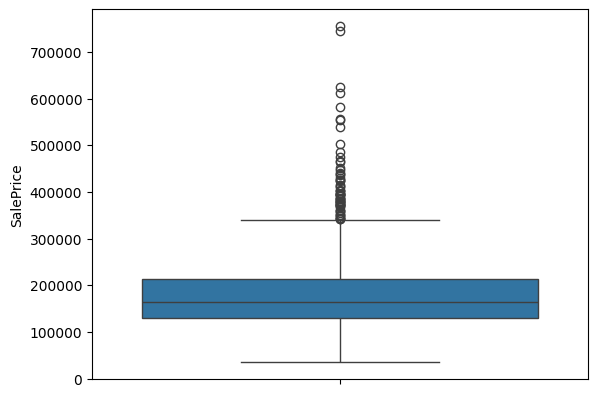

In [7]:
sns.boxplot(data_df['SalePrice'])

Il y a deux valeurs aberrantes (outliers) avec des prix supérieurs à 700 000.

<Axes: xlabel='SalePrice', ylabel='Density'>

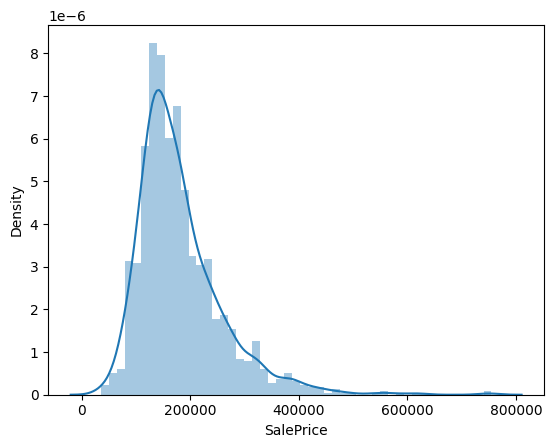

In [8]:
# The Density Plot of SalePrice
sns.distplot(data_df['SalePrice'])

On a remarqué que la distribution est asymétrique vers la droite, avec un pic autour de 160 000 et une longue traîne allant jusqu’à environ 800K.

In [9]:
# Positive Skeweness:
data_df['SalePrice'].skew()

np.float64(1.8828757597682129)

Afin de rendre la distribution de SalePrice plus proche d’une distribution normale, j’ai appliqué une transformation logarithmique.

In [10]:
data_df["SalePrice"] = np.log1p(data_df["SalePrice"])

Text(0.5, 1.0, 'Courbe de densité de SalePrice après transformation logarithmique.')

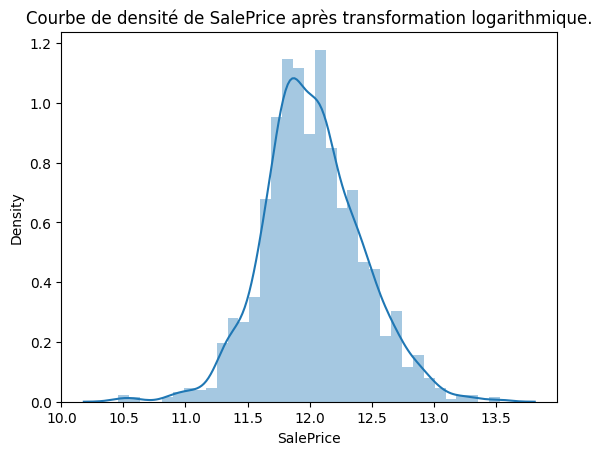

In [11]:
# SalePrice after Log-transformation
sns.distplot(data_df["SalePrice"])
plt.title("Courbe de densité de SalePrice après transformation logarithmique.")

In [12]:
y_train = data_df["SalePrice"]

In [13]:
col_nan = data_df.isna().sum() / data_df.shape[0]

Text(0.5, 1.0, 'Colonnes avec le plus fort pourcentage de valeurs manquantes (NaN)')

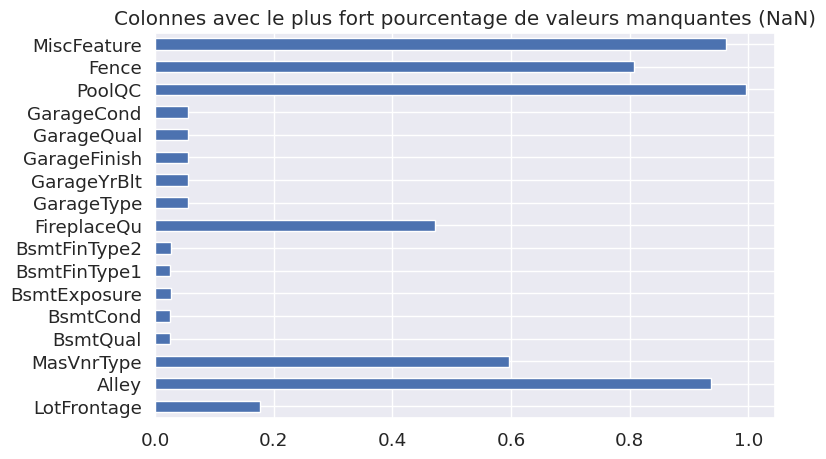

In [14]:
plt.figure(figsize=(8, 5))
sns.set(font_scale=1.2)
col_nan[col_nan > 0.01].plot(kind = "barh")
plt.title("Colonnes avec le plus fort pourcentage de valeurs manquantes (NaN)")

In [15]:
"""Dans certains essais, on a supprimé les colonnes contenant plus de 90 % de valeurs manquantes,
mais finalement, on les a conservées pour une analyse ultérieure."""

# drop_out_columns = data_df.columns[[inx for inx, i in enumerate(col_nan >= 0.95) if i==True]]
# data_df = data_df.drop(drop_out_columns, axis=1)
# test_df = test_df.drop(drop_out_columns, axis=1)

'Dans certains essais, on a supprimé les colonnes contenant plus de 90 % de valeurs manquantes,\nmais finalement, on les a conservées pour une analyse ultérieure.'

**Removing Id column**

In [16]:
# Dropping columns for both train and test dataset
data_df = data_df.drop("Id", axis=1)
test_df = test_df.drop("Id", axis=1)

**Suppression des colonnes dont toutes les valeurs sont identiques (100 % identiques)**

D’après les statistiques de base fournies sur le site de la compétition Kaggle, les colonnes Street et Utilities contiennent chacune une seule valeur, respectivement "Pave" et "AllPub".

In [17]:
data_df = data_df.drop(["Street", "Utilities"], axis=1)
test_df = test_df.drop(["Street", "Utilities"], axis=1)

 **Suppression des valeurs aberrantes**

La suppression des valeurs aberrantes est une étape importante dans l’analyse des données.
Cependant, en apprentissage automatique, il faut être prudent lors de cette suppression, car on ne sait pas s’il n’y a pas aussi des outliers dans le jeu de test.

Pour ce jeu de données, nous avons utilisé deux techniques : une plus rigoureuse et une moins rigoureuse.

La première méthode était la méthode du score Z. Les scores Z sont exprimés en termes d’écarts-types par rapport à leur moyenne.
Ainsi, ces scores Z suivent une distribution avec une moyenne de 0 et un écart-type de 1.
Nous avons fixé un seuil à 3 pour identifier les valeurs aberrantes.
$$ z = \frac{x - \mu}{\sigma} $$


In [18]:
def remove_outliers(dataset, threshold, columns=None, removed = False):
    if columns==None:
        numerics = ['int64','float64']
        columns = dataset.select_dtypes(include=numerics).columns

    tmp = dataset.copy()
    z = np.abs(stats.zscore(tmp[columns]))
    outliers = [row.any() for row in (z > threshold)]
    outliers_idxs = tmp.index[outliers].tolist()
    print("Number of removed rows = {}".format(len(outliers_idxs)))
    if removed: return dataset.drop(outliers_idxs), tmp.loc[outliers]
    else: return dataset.drop(outliers_idxs)

In [19]:
# clear_data is a dataframe with train data after removing outliers

# clear_data, removed_data = remove_outliers(data_df, threshold = 3, removed=True,
#                              columns=['GrLivArea'])

Enfin, après quelques essais, nous avons utilisé une méthode moins rigoureuse.
Nous avons simplement réalisé un graphique de SalePrice en fonction de GrLivArea et retiré les points qui semblaient être des valeurs aberrantes.

**Suppression des valeurs aberrantes selon GrLivArea**

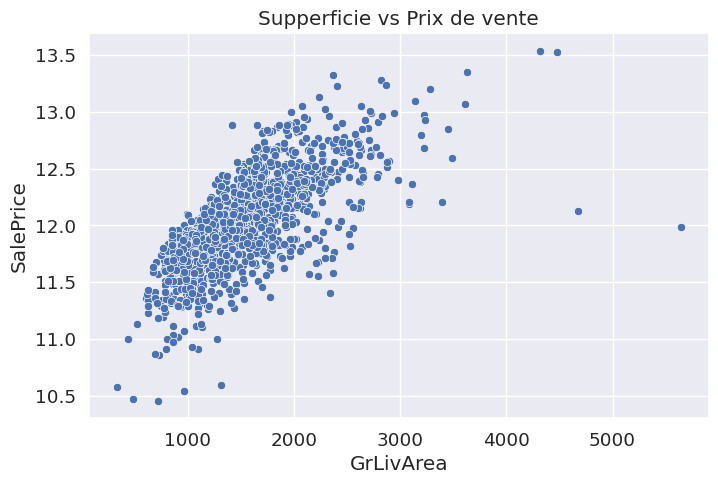

In [20]:
plt.figure(figsize=(8, 5))
sns.set(font_scale=1.2)

# Corrigé : préciser les arguments x et y nommément
sns.scatterplot(x=data_df["GrLivArea"], y=data_df["SalePrice"])

# plt.vlines(4500, ymax=800000, ymin=0)  # Optionnel, ligne verticale
plt.title("Supperficie vs Prix de vente")
plt.show()

In [21]:
#Nous avons décidé de supprimer les enregistrements où la valeur de GrLivArea est supérieure à 4500.
#Comme on peut le voir sur le graphique, ces observations ont un prix très faible.
clear_data = data_df.drop(data_df[(data_df['GrLivArea']>4500)].index)

In [22]:
#Concaténer toutes les données ensemble — à la fois les jeux d’entraînement et de test.
train_ = clear_data.drop(['SalePrice'], axis=1)
all_data = pd.concat([data_df, test_df]).reset_index(drop=True)

**La variable GarageYrBlt (Année de construction)**

Nous avons vérifié s’il y avait des enregistrements où les valeurs de YearBuilt ou GarageYrBlt dépassaient l’année 2017.

In [23]:
print("Y a-t-il des valeurs de YearBuilt supérieures à 2017 ? : ", all_data[all_data.YearBuilt > 2017].count()[0] != 0)
print("Y a-t-il des valeurs de GarageYrBlt supérieures à 2017 ? : ", all_data[all_data.GarageYrBlt > 2017].count()[0] != 0)

Y a-t-il des valeurs de YearBuilt supérieures à 2017 ? :  False
Y a-t-il des valeurs de GarageYrBlt supérieures à 2017 ? :  True


In [24]:
all_data[all_data.GarageYrBlt > 2017].GarageYrBlt #Il semble que ce soit une faute de frappe.

,GarageYrBlt
2592,2207.0


In [25]:
all_data.loc[2590, 'GarageYrBlt'] = 2007

**La variable LotFrontage (Longueur de la rue connectée à la propriété)**

LotFrontage correspond à la longueur en pieds linéaires de la rue bordant la propriété.
Nous pensons qu’il est très probable que ces valeurs soient similaires pour les maisons situées dans un même quartier.
Nous avons donc vérifié quelques statistiques à leur sujet.

In [26]:
neigh_lot_frontage = all_data.groupby('Neighborhood')['LotFrontage'].agg(["mean", "median"])
neigh_lot_frontage['avg_mean_median'] = (neigh_lot_frontage['mean'] + neigh_lot_frontage['median'] )/ 2
neigh_lot_frontage

,mean,median,avg_mean_median
Neighborhood,,,
Blmngtn,46.900000,43.0,44.950000
Blueste,27.300000,24.0,25.650000
BrDale,21.500000,21.0,21.250000
BrkSide,55.789474,51.0,53.394737
ClearCr,88.150000,80.5,84.325000
CollgCr,71.336364,70.0,70.668182
Crawfor,69.951807,70.0,69.975904
Edwards,66.910112,65.0,65.955056
Gilbert,74.207207,64.0,69.103604


In [27]:
# transformation en medians
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

**Transformation de certaines variables numériques qui sont en réalité catégorielles.**

In [28]:
def convert_to_string(df, columns):
    df[columns] = df[columns].astype(str)
    return df

In [29]:
num_to_categ_features = ['MSSubClass', 'OverallCond']#, 'YrSold', 'MoSold']

all_data = convert_to_string(all_data, columns = num_to_categ_features)

**Remplacement des valeurs manquantes dans le reste des colonnes numériques**

Pour les autres données numériques, nous allons également estimer les valeurs manquantes en nous basant sur leurs statistiques.
Pour cela, nous utiliserons l’objet SimpleImputer de la bibliothèque sklearn.

Pour les colonnes : BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, BsmtFullBath, BsmtHalfBath et MasVnrArea, nous remplacerons les valeurs manquantes par une constante égale à 0.
Pour le reste des colonnes numériques, nous utiliserons la médiane.

In [30]:
num_features = all_data.select_dtypes(include=['int64','float64']).columns
num_features_to_constant = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', "MasVnrArea"]
num_features_to_median = [feature for feature in num_features if feature not in num_features_to_constant + ["SalePrice"]]

In [31]:
# Génération des variables numériques en entrée pour DataFrameMapper.
numeric_features_median = sklearn_pandas.gen_features(columns=[num_features_to_median],
                                               classes=[{'class': SimpleImputer,
                                                         'strategy': 'median',
                                                         'missing_values' : np.nan}])

numeric_features_zero = sklearn_pandas.gen_features(columns=[num_features_to_constant],
                                               classes=[{'class': SimpleImputer,
                                                         'strategy': 'constant',
                                                         'fill_value' : 0,
                                                         'missing_values' : np.nan}])

missing_val_imputer = sklearn_pandas.DataFrameMapper(numeric_features_median + numeric_features_zero)

# Ajustement
imputed_median = missing_val_imputer.fit(all_data)

# Transformation
imputed_features = imputed_median.transform(all_data)

# Chargement dans un dataframe
imputed_df = pd.DataFrame(imputed_features, index=all_data.index, columns=num_features_to_median + num_features_to_constant)


**Catégoriel vers numérique**

Il y a beaucoup de variables catégorielles dans les données,
donc l’étape suivante consiste à les transformer en valeurs numériques.

In [32]:
# Sélection des variables catégorielles
cat_feats = all_data.select_dtypes(include=['object']).columns

D’après la description des données (valeurs possibles pour chaque variable) sur Kaggle,
nous avons créé une liste de correspondances spécifiques pour chaque colonne à convertir.

In [33]:
none_conversion = [("MasVnrType","None"),
                  ("BsmtQual","NA"),
                  ("Electrical", "SBrkr"),
                  ("BsmtCond","TA"),
                  ("BsmtExposure","No"),
                  ("BsmtFinType1","No"),
                  ("BsmtFinType2","No"),
                  ("CentralAir","N"),
                  ("Condition1","Norm"),
                  ("Condition2","Norm"),
                  ("ExterCond","TA"),
                  ("ExterQual","TA"),
                  ("FireplaceQu","NA"),
                  ("Functional","Typ"),
                  ("GarageType","No"),
                  ("GarageFinish","No"),
                  ("GarageQual","NA"),
                  ("GarageCond","NA"),
                  ("HeatingQC","TA"),
                  ("KitchenQual","TA"),
                  ("Functional","Typ"),
                  ("GarageType","No"),
                  ("GarageFinish","No"),
                  ("GarageQual","No"),
                  ("GarageCond","No"),
                  ("HeatingQC","TA"),
                  ("KitchenQual","TA"),
                  ("MSZoning", "None"),
                  ("Exterior1st", "VinylSd"),
                  ("Exterior2nd", "VinylSd"),
                  ("SaleType", "WD")]

Nous avons implémenté la fonction none_transform, qui convertit les valeurs manquantes des variables catégorielles en chaînes de caractères spécifiques, définies dans le dictionnaire none_conversion.

In [34]:
def none_transform(df, conversion_list):
    for col, new_str in conversion_list:
        df.loc[:, col] = df.loc[:, col].fillna(new_str)
    return df

In [35]:
all_data = none_transform(all_data, none_conversion)

In [36]:
len(all_data.columns)

78

**Transformation des variables asymétriques**

Comme les modèles linéaires préfèrent généralement des données suivant une distribution normale,
nous transformons les variables asymétriques afin de les rendre plus proches d’une distribution normale.

In [41]:
# Collecte des variables numériques sans inclure SalePrice
numeric_features = [feat for feat in num_features if feat not in ['SalePrice']]

# Sélection des colonnes dont l’asymétrie (skewness) est supérieure à 0,5
skewed_features = all_data[num_features].apply(lambda x: x.dropna().skew())
skewed_features = skewed_features[skewed_features > 0.5].index
print("\nHighly skewed features: \n\n{}".format(skewed_features.tolist()))


Highly skewed features: 

['MasVnrArea', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


Nous avons testé deux méthodes : la transformation logarithmique (log-transformation) et la transformation de Box-Cox.
Comme la méthode de Box-Cox a donné des résultats légèrement meilleurs, nous avons finalement décidé de l’utiliser.

In [38]:
# Applying log-transformation
# all_data[skewed_features] = np.log1p(all_data[skewed_features])# test_df[skewed_features] = np.log1p(test_df[skewed_features])

La transformation de Box-Cox est une méthode permettant de transformer des variables dépendantes non normales afin de leur donner une forme plus proche d’une distribution normale.

In [39]:
#Le lambda optimal est celui qui permet d’obtenir la meilleure approximation d’une courbe de distribution normale.

lambda_ = 0.15
for feature in skewed_features:
    all_data[feature] = boxcox1p(all_data[feature], lambda_)

**Conversion des variables catégorielles en variables numériques**


Comme certaines variables catégorielles (par exemple, KitchenQual, GarageQual) peuvent être converties en valeurs numériques ordonnées,
nous avons également implémenté un nouvel encodeur spécifique pour ces cas.

In [40]:
class OrderedLabelTransformer(BaseEstimator, TransformerMixin):
    orderDict = {"NA" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5}

    @staticmethod
    def get_dict(X):
        FirstDict = {"Po" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4}
        SecondDict = {"NA" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5}
        ThirdDict = {"NA" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4}
        for d in [FirstDict, SecondDict, ThirdDict]:
            if set(X) == set(d):
                return d

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        def get_label(t):
            return self.orderDict[t]
        return np.array([get_label(n) for n in X])

Certains quartiers semblent plus chers que d’autres, donc…

In [42]:
class NeighborhoodTransformer(BaseEstimator, TransformerMixin):
    neighborhoodsmap = {'StoneBr' : 2, 'NridgHt' : 2, 'NoRidge': 2,
                        'MeadowV' : 0, 'IDOTRR' : 0, 'BrDale' : 0 ,
                        'CollgCr': 1, 'Veenker' : 1, 'Crawfor' : 1,
                        'Mitchel' : 1, 'Somerst' : 1, 'NWAmes' : 1,
                        'OldTown' : 1, 'BrkSide' : 1, 'Sawyer' : 1,
                        'NAmes' : 1, 'SawyerW' : 1, 'Edwards' : 1,
                        'Timber' : 1, 'Gilbert' : 1, 'ClearCr' : 1,
                        'NPkVill' : 1, 'Blmngtn' : 1, 'SWISU' : 1,
                        'Blueste': 1}

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        def get_label(t):
            return self.neighborhoodsmap[t]
        return np.array([get_label(n) for [n] in X])

Comme nous avons déjà implémenté des transformateurs spécifiques pour les données catégorielles, nous r'exécutons l’ensemble du pipeline pour ces variables.

In [43]:
# Generating features:
order_feats = ["ExterQual", "ExterCond", "HeatingQC", "KitchenQual", "BsmtQual",
               "BsmtCond", "FireplaceQu", "GarageQual", "GarageCond"]

original_features_df = all_data[order_feats + ['Neighborhood']] # we need to save original values for one-hot encoding

order_features = sklearn_pandas.gen_features(order_feats, [OrderedLabelTransformer])
neighb_features = [(['Neighborhood'], [NeighborhoodTransformer()])]

# Pipeline
label_encoder = sklearn_pandas.DataFrameMapper(neighb_features + order_features)

# The list with order of column names
cols = ["Neighborhood"] + order_feats

# Transformation both train and test set
transformed_feats = label_encoder.fit_transform(all_data)

# Putting transformed features into dataframe
transformed_df = pd.DataFrame(transformed_feats, index=all_data.index, columns=cols)

In [44]:
original_features_df.shape

(2919, 10)

In [45]:
# feature without any transformation till now
rest_features = set(pd.concat([imputed_df, original_features_df],axis=1).columns).symmetric_difference(set(all_data.columns))
rest_features_df = all_data[list(rest_features)]

In [46]:
all_data = pd.concat([imputed_df, original_features_df, rest_features_df],axis=1)

In [47]:
all_data.shape

(2919, 78)

## Feature Engineering

**Création de nouvelles variables**

Ces variables semblent utiles pour la prédiction du prix des maisons.
Comme elles ne sont pas présentes dans le jeu de données Kaggle, j’ai décidé de les créer à partir d’autres informations :

- TotalSqrtFeet – Surface habitable totale
- TotalBaths – Surface totale des salles de bain

In [48]:
all_data["TotalSqrtFeet"] = all_data["GrLivArea"] + all_data["TotalBsmtSF"]

all_data["TotalBaths"] = all_data["BsmtFullBath"] + (all_data["BsmtHalfBath"]  * .5) + all_data["FullBath"] + (all_data["HalfBath"]* .5)

In [49]:
# Si la maison possède un garage
all_data['Isgarage'] = all_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)

# Si la maison possède une cheminée
all_data['Isfireplace'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

# Si la maison possède une piscine
all_data['Ispool'] = all_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

# Si la maison possède un deuxième étage
all_data['Issecondfloor'] = all_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)

# Si la maison possède un porche ouvert
all_data['IsOpenPorch'] = all_data['OpenPorchSF'].apply(lambda x: 1 if x > 0 else 0)

# Si la maison possède une terrasse en bois
all_data['IsWoodDeck'] = all_data['WoodDeckSF'].apply(lambda x: 1 if x > 0 else 0)

**Encodage one-hot**

In [50]:
all_data = all_data.drop(["SalePrice"], axis = 1)

hot_one_features = pd.get_dummies(all_data).reset_index(drop=True)
hot_one_features.shape

(2919, 324)

In [51]:
all_data = pd.concat([transformed_df, hot_one_features],axis=1)

In [87]:
# export all_data en csv

all_data.to_csv('all_data.csv', index=False)


## Séparation en ensembles d’entraînement et de test

In [52]:
train_preprocessed = all_data.iloc[:len(data_df),:]
test_preprocessed = all_data.iloc[len(train_preprocessed):,:]
print(len(test_preprocessed) == len(test_df))

True


# Modélisation
-----------------------------------

In [58]:
X_train = train_preprocessed

In [59]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

from sklearn.linear_model import ElasticNet, Lasso, ElasticNetCV
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.base import RegressorMixin
import lightgbm as lgb

In [60]:
print('Environment specification:\n')
for mod in sklearn, xgb, lgb:
    print(mod.__name__, mod.__version__)

Environment specification:

sklearn 1.6.1
xgboost 2.1.4
lightgbm 4.5.0


**Définition de la fonction de scoring**

In [61]:
def rmse(model):
    n_folds=5
    kfold = KFold(n_folds, random_state=42, shuffle=True).get_n_splits(X_train)
    rmse_score = np.sqrt(-cross_val_score(model, X_train, y_train, scoring = "neg_mean_squared_error", cv = kfold, verbose = -1, n_jobs=-1))
    return(np.mean(rmse_score))

**Régression linéaire**

In [64]:
lr_model = make_pipeline(RobustScaler(), LinearRegression())

lr_model.fit(X_train, y_train)
y_train_pred = lr_model.predict(X_train)
MSE_train = np.mean((y_train_pred - y_train)**2)

print("Mean Squared Error = {:.8f}".format(MSE_train))

# Fonction rmse corrigée
def rmse(model, X, y):
    from sklearn.model_selection import cross_val_score
    neg_mse_scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5, verbose=0)
    rmse_scores = np.sqrt(-neg_mse_scores)
    return np.mean(rmse_scores)

print("RMSE score for Linear Regression: {:.3f}".format(rmse(lr_model, X_train, y_train)))

Mean Squared Error = 0.00858436
RMSE score for Linear Regression: 0.160


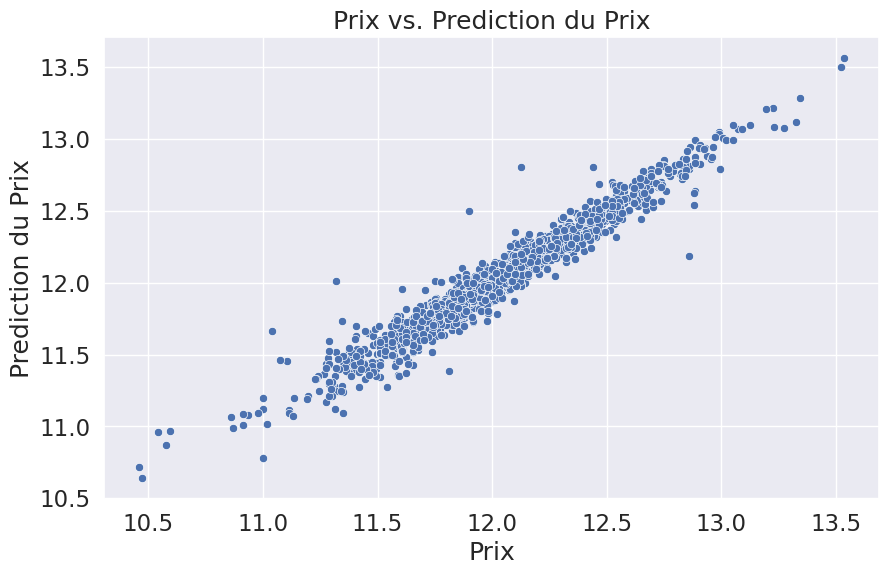

In [68]:
sns.set(font_scale=1.5)
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_train, y=y_train_pred)
plt.xlabel("Prix")
plt.ylabel("Prediction du Prix")
plt.title("Prix vs. Prediction du Prix")
plt.show()

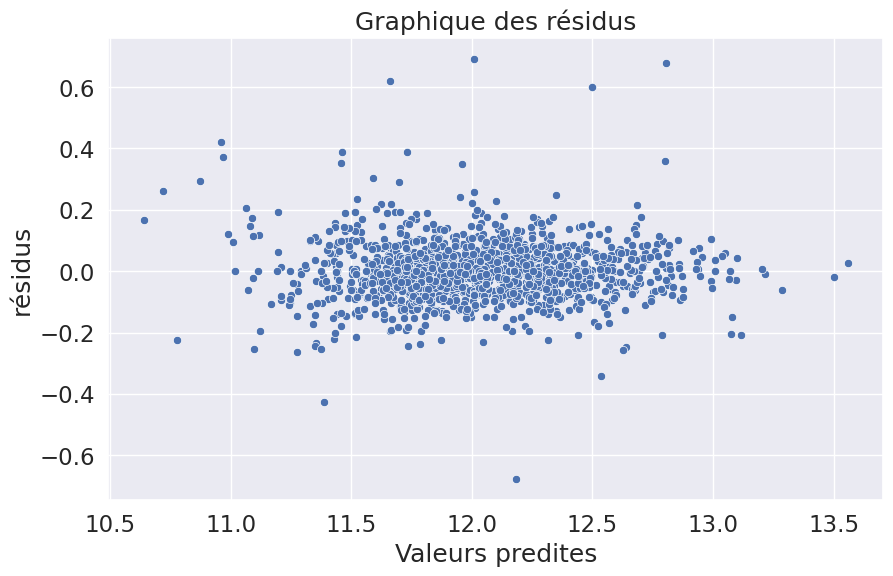

In [71]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_train_pred, y=y_train_pred - y_train)
plt.title("Graphique des résidus")
plt.xlabel("Valeurs predites")
plt.ylabel("résidus")
plt.show()

**Modèle LASSO**

In [114]:
lasso_model = make_pipeline(RobustScaler(),
                         LassoCV(alphas = [0.0004, 0.0005, 0.0006],
                                 random_state = 0,
                                 cv = 10))

lasso_model.fit(X_train, y_train)

y_train_pred = lasso_model.predict(X_train)
MSE_train = np.mean((y_train_pred - y_train)**2)

print("Mean Squared Error = {:.8f}".format(MSE_train))
print("RMSE score for LASSO: {:.3f}".format(rmse(lasso_model, X_train, y_train)))

Mean Squared Error = 0.01197438
RMSE score for LASSO: 0.135


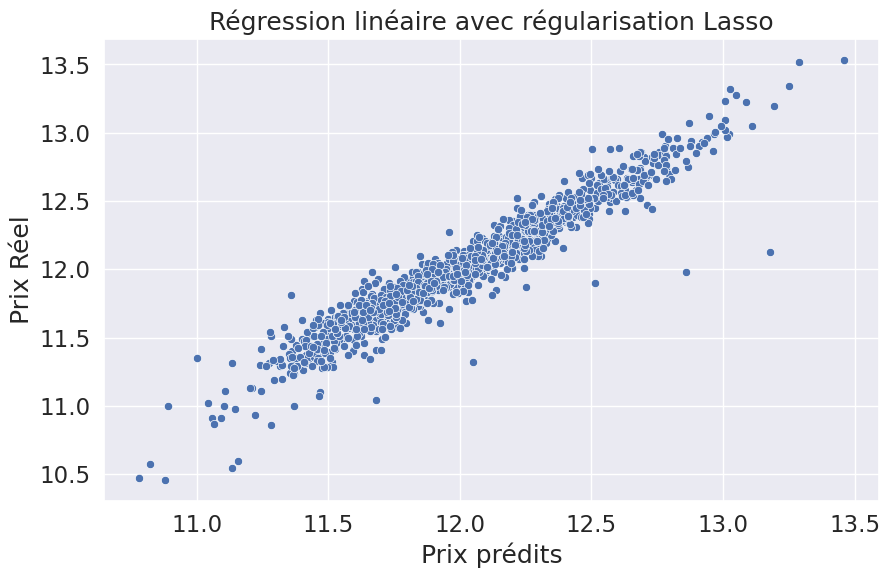

In [77]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_train_pred, y=y_train)
plt.title("Régression linéaire avec régularisation Lasso")
plt.xlabel("Prix prédits")
plt.ylabel("Prix Réel")
plt.show()

**Régression par Gradient Boosting**

In [82]:
gbr = GradientBoostingRegressor(random_state=0)
param_grid = {'n_estimators': [2500],
              'max_features': [13],
              'max_depth': [5],
              'learning_rate': [0.05],
              'subsample': [0.8],
             'random_state' : [5]}

gb_model = GridSearchCV(estimator=gbr, param_grid=param_grid, n_jobs=1, cv=5)
gb_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=0),
             n_jobs=1,
             param_grid={'learning_rate': [0.05], 'max_depth': [5],
                         'max_features': [13], 'n_estimators': [2500],
                         'random_state': [5], 'subsample': [0.8]})

In [84]:
y_train_pred = gb_model.predict(X_train)
MSE_train = np.mean((y_train_pred - y_train)**2)
print('Best Parameters: {}'.format(gb_model.best_params_))
print("Mean Squared Error = {:.8f}".format(MSE_train))

Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'max_features': 13, 'n_estimators': 2500, 'random_state': 5, 'subsample': 0.8}
Mean Squared Error = 0.00000952


**Régression XGBoost**

In [88]:
xgbreg = xgb.XGBRegressor(seed=0)
param_grid2 = {'n_estimators': [2000],
              'learning_rate': [0.05],
              'max_depth': [3, 7],
              'subsample': [0.8],
              'colsample_bytree': [0.45, 0.75]}

xgb_model = GridSearchCV(estimator=xgbreg, param_grid=param_grid2, n_jobs=1, cv=10)
xgb_model.fit(X_train, y_train)

y_train_pred = xgb_model.predict(X_train)
MSE_train = np.mean((y_train_pred - y_train)**2)

print('\n\nBest Parameters: {}'.format(xgb_model.best_params_))
print("Mean Squared Error = {:.8f}".format(MSE_train))



Best Parameters: {'colsample_bytree': 0.45, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 2000, 'subsample': 0.8}
Mean Squared Error = 0.00050016


**ElasticNet**

In [89]:
en_model = ElasticNetCV(alphas = [0.0001, 0.0003, 0.0004, 0.0006],
                        l1_ratio = [.9, .92],
                        random_state = 0,
                        cv=10)


In [90]:
en_model.fit(X_train, y_train)

y_train_pred = en_model.predict(X_train)
MSE_train = np.mean((y_train_pred - y_train)**2)

In [92]:
print("Mean Squared Error = {:.8f}".format(MSE_train))
print("RMSE score for ElasticNet: {:.3f}".format(rmse(en_model, X_train, y_train)))

Mean Squared Error = 0.01171991
RMSE score for ElasticNet: 0.136


**LightGBM**

In [94]:
lgb_model = lgb.LGBMRegressor(objective='regression', num_leaves=5,
                              learning_rate=0.05, n_estimators=800,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

lgb_model.fit(X_train, y_train)

y_train_pred = lgb_model.predict(X_train)
MSE_train = np.mean((y_train_pred - y_train)**2)

print("Mean Squared Error = {:.8f}".format(MSE_train))
print("RMSE score for LGBMRegressor: {:.4f}".format(rmse(en_model, X_train, y_train)))

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2, colsa

**BaggingRegressor**

In [97]:
from sklearn.ensemble import BaggingRegressor

model2 = BaggingRegressor(estimator=en_model, n_estimators=50,
                          max_samples=0.8, max_features=0.8,
                          verbose=3, n_jobs=3)
model2.fit(X_train, y_train)

y_train_pred = model2.predict(X_train)
MSE_train = np.mean((y_train_pred - y_train) ** 2)

print("Mean Squared Error = {:.8f}".format(MSE_train))

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:  2.4min finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.1s finished


Mean Squared Error = 0.01230858


### Stacking

In [100]:
from mlxtend.regressor import StackingCVRegressor
from sklearn.pipeline import make_pipeline


In [101]:
lasso_model = make_pipeline(RobustScaler(),
                      LassoCV(max_iter=1e7, alphas = [0.0005],
                              random_state = 42, cv=5))

elasticnet_model = make_pipeline(RobustScaler(),
                           ElasticNetCV(max_iter=1e7, alphas=[0.0005],
                                        cv=5, l1_ratio=0.9))

lgbm_model = make_pipeline(RobustScaler(),
                        lgb.LGBMRegressor(objective='regression',num_leaves=5,
                                      learning_rate=0.05, n_estimators=800,
                                      max_bin = 55, bagging_fraction = 0.8,
                                      bagging_freq = 5, feature_fraction = 0.23,
                                      feature_fraction_seed = 9, bagging_seed=9,
                                      min_data_in_leaf = 6,
                                      min_sum_hessian_in_leaf = 11))

xgboost_model = make_pipeline(RobustScaler(),
                        xgb.XGBRegressor(learning_rate = 0.01, n_estimators=3400,
                                     max_depth=3,min_child_weight=0 ,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective= 'reg:linear',nthread=4,
                                     scale_pos_weight=1,seed=27,
                                     reg_alpha=0.00006))

In [102]:
stack_regressor = StackingCVRegressor(regressors=(lasso_model, elasticnet_model, xgboost_model, lgbm_model),
                               meta_regressor=xgboost_model, use_features_in_secondary=True)

**Running**

In [107]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

base_learners = [
    ('ridge', RidgeCV()),
    ('elastic', ElasticNet()),
    ('gbr', GradientBoostingRegressor())
]

stack_regressor = StackingRegressor(
    estimators=base_learners,
    final_estimator=DecisionTreeRegressor()
)

stack_model = stack_regressor.fit(X_train, y_train)

In [108]:
en_preds = en_model.predict(test_preprocessed)

In [115]:
lasso_preds = lasso_model.predict(test_preprocessed)

In [110]:
stack_gen_preds = stack_model.predict(test_preprocessed)

In [111]:
lgbm_preds = lgb_model.predict(test_preprocessed)

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


In [116]:
# Weighted predictions
stack_preds = ((0.2*en_preds) + (0.25*lasso_preds) + (0.15*lgbm_preds) + (0.4*stack_gen_preds))

In [117]:
predictions_df = pd.DataFrame(np.expm1(stack_preds),
                              index = test_preprocessed.index+1,
                              columns=["SalePrice"])
predictions_df.index.name = "Id"
predictions_df.head()

,SalePrice
Id,
1461,130406.418632
1462,153065.861285
1463,194297.311882
1464,186940.204238
1465,192994.188648


##Sauvegarde du modele lineaire pour le reutiliser dans le dashbord

In [ ]:
# prompt: sauvegarde moi le model du lineaire en .joblib

import joblib

# sauvegarder le modèle linéaire
joblib.dump(lr_model, 'linear_regression_model.joblib')

print("Le modèle de régression linéaire a été sauvegardé au format .joblib")
